<a href="https://colab.research.google.com/github/anjha1/Project/blob/main/anjha_project_Employee_performance1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Names :**EMPLOYEE PERFORMANCE ANALYSIS

**NAME :**  *Achhuta Nand Jha*

**Roll No :** 2315200002

**DATA PRE-PROCESSING & FEATURE SELECTION:**\
DATA PRE-PROCESSING SUMMARY:\
*  Ckeck Missing Value
*  Convert categorical to numerical
*  Check outliers & Impute outliers
*  Feature transformation
*  Feature scaling

**FEATURE SELECTION SUMMARY:**
* Drop unique & Constant Column
* Check correlation with heatmap & Remove highly correlated feature
* Check Duplicates
* Principle component analysis
* Save pre-process data

**IMPORT NECESSARY LIBRARY**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import pylab
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

**LOAD DATA FOR EXPLOTARY DATA ANALYSIS**

In [4]:
data = pd.read_csv('Employee_Performance.csv')
pd.set_option('display.max_columns',None)

**CHECK MISSING VALUE:**

In [5]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64



*   Their is no missing value present in the data.



**CONVERT CATEGORICAL TO NUMERICAL**

In [6]:
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

**Technique Used:**

**1.Mannual Encoding:** Mannual encoding is a best techinque to handel \categorical feature with the help of map function, map the labels based on\ frequency.

**2.Frequency Encoding:** Frequency encoding is an encoding technique to transform an original categorical variable to a numerical variable by considering the frequency distribution of the data getting value counts.

1.   **Gender:**


In [7]:
data.Gender.value_counts()

Gender
Male      53
Female    33
Name: count, dtype: int64

In [8]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

*  Map male with 1 and female with 0

2. ** Education Background**

In [9]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

EducationBackground
Life Sciences       35
Medical             23
Marketing           14
Technical Degree     7
Other                5
Human Resources      2
Name: count, dtype: int64

In [10]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [11]:
# Checking conversion happen or not
data.EducationBackground.value_counts()

EducationBackground
5    35
4    23
3    14
2     7
1     5
0     2
Name: count, dtype: int64

3. **Marital Status**

In [12]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

MaritalStatus
Married     36
Single      30
Divorced    20
Name: count, dtype: int64

In [13]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [14]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

MaritalStatus
2    36
1    30
0    20
Name: count, dtype: int64

4. **Employee Department**

In [15]:
# Get the value counts of employee department
data.EmpDepartment.value_counts()

EmpDepartment
Research & Development    41
Sales                     35
Human Resources            6
Finance                    4
Name: count, dtype: int64

In [16]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [17]:
# Check conversion happen or not
data.EmpDepartment.value_counts()

EmpDepartment
3    41
5    35
2     6
1     4
Name: count, dtype: int64

5. **Employee Job Role**

In [18]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              25
Research Scientist           14
Manager R&D                  11
Manager                      10
Laboratory Technician         5
Human Resources               5
Finance Manager               4
Sales Representative          3
Healthcare Representative     3
Research Director             3
Manufacturing Director        2
Senior Manager R&D            1
Name: count, dtype: int64

In [19]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [20]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

EmpJobRole
18    25
15    14
16    11
11    10
13     5
9      5
10     4
14     3
6      3
4      3
7      2
2      1
Name: count, dtype: int64

6. **Business Travel Frequency:**

In [21]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        53
Travel_Frequently    17
Non-Travel           16
Name: count, dtype: int64

In [22]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [23]:
# Check conversion happen or not
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    53
1    17
0    16
Name: count, dtype: int64

7. **Overtime:**

In [24]:
# Get the value count of Overtime
data.OverTime.value_counts()


OverTime
No     62
Yes    24
Name: count, dtype: int64

In [25]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [26]:
# Check conversion happen or not
data.OverTime.value_counts()

OverTime
1    62
0    24
Name: count, dtype: int64

8. **Attrition**

In [27]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
No     75
Yes    11
Name: count, dtype: int64

In [28]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [29]:
# Check conversion happen or not
data.Attrition.value_counts()

Attrition
1    75
0    11
Name: count, dtype: int64

In [30]:
# Check all data features
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
1,E1001025,30,1,3,0,5,18,2,27,5,3,99,3,2,4,7,1,23,4,10,2,2,8,7,7,7,1,4
2,E1001054,52,1,3,2,5,11,2,3,4,3,31,2,4,1,1,1,11,1,34,3,4,34,6,1,16,1,4
3,E1001059,25,0,4,1,5,18,2,26,1,3,32,3,2,4,1,1,23,2,6,5,2,6,5,1,4,1,4
4,E1001064,34,1,1,1,5,18,2,2,3,4,60,3,2,4,1,1,22,3,6,5,3,6,5,1,4,1,4


**CHECK OUTLIERS AND IMPUTE OUTLIERS:**\
**BoxPlot:** Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

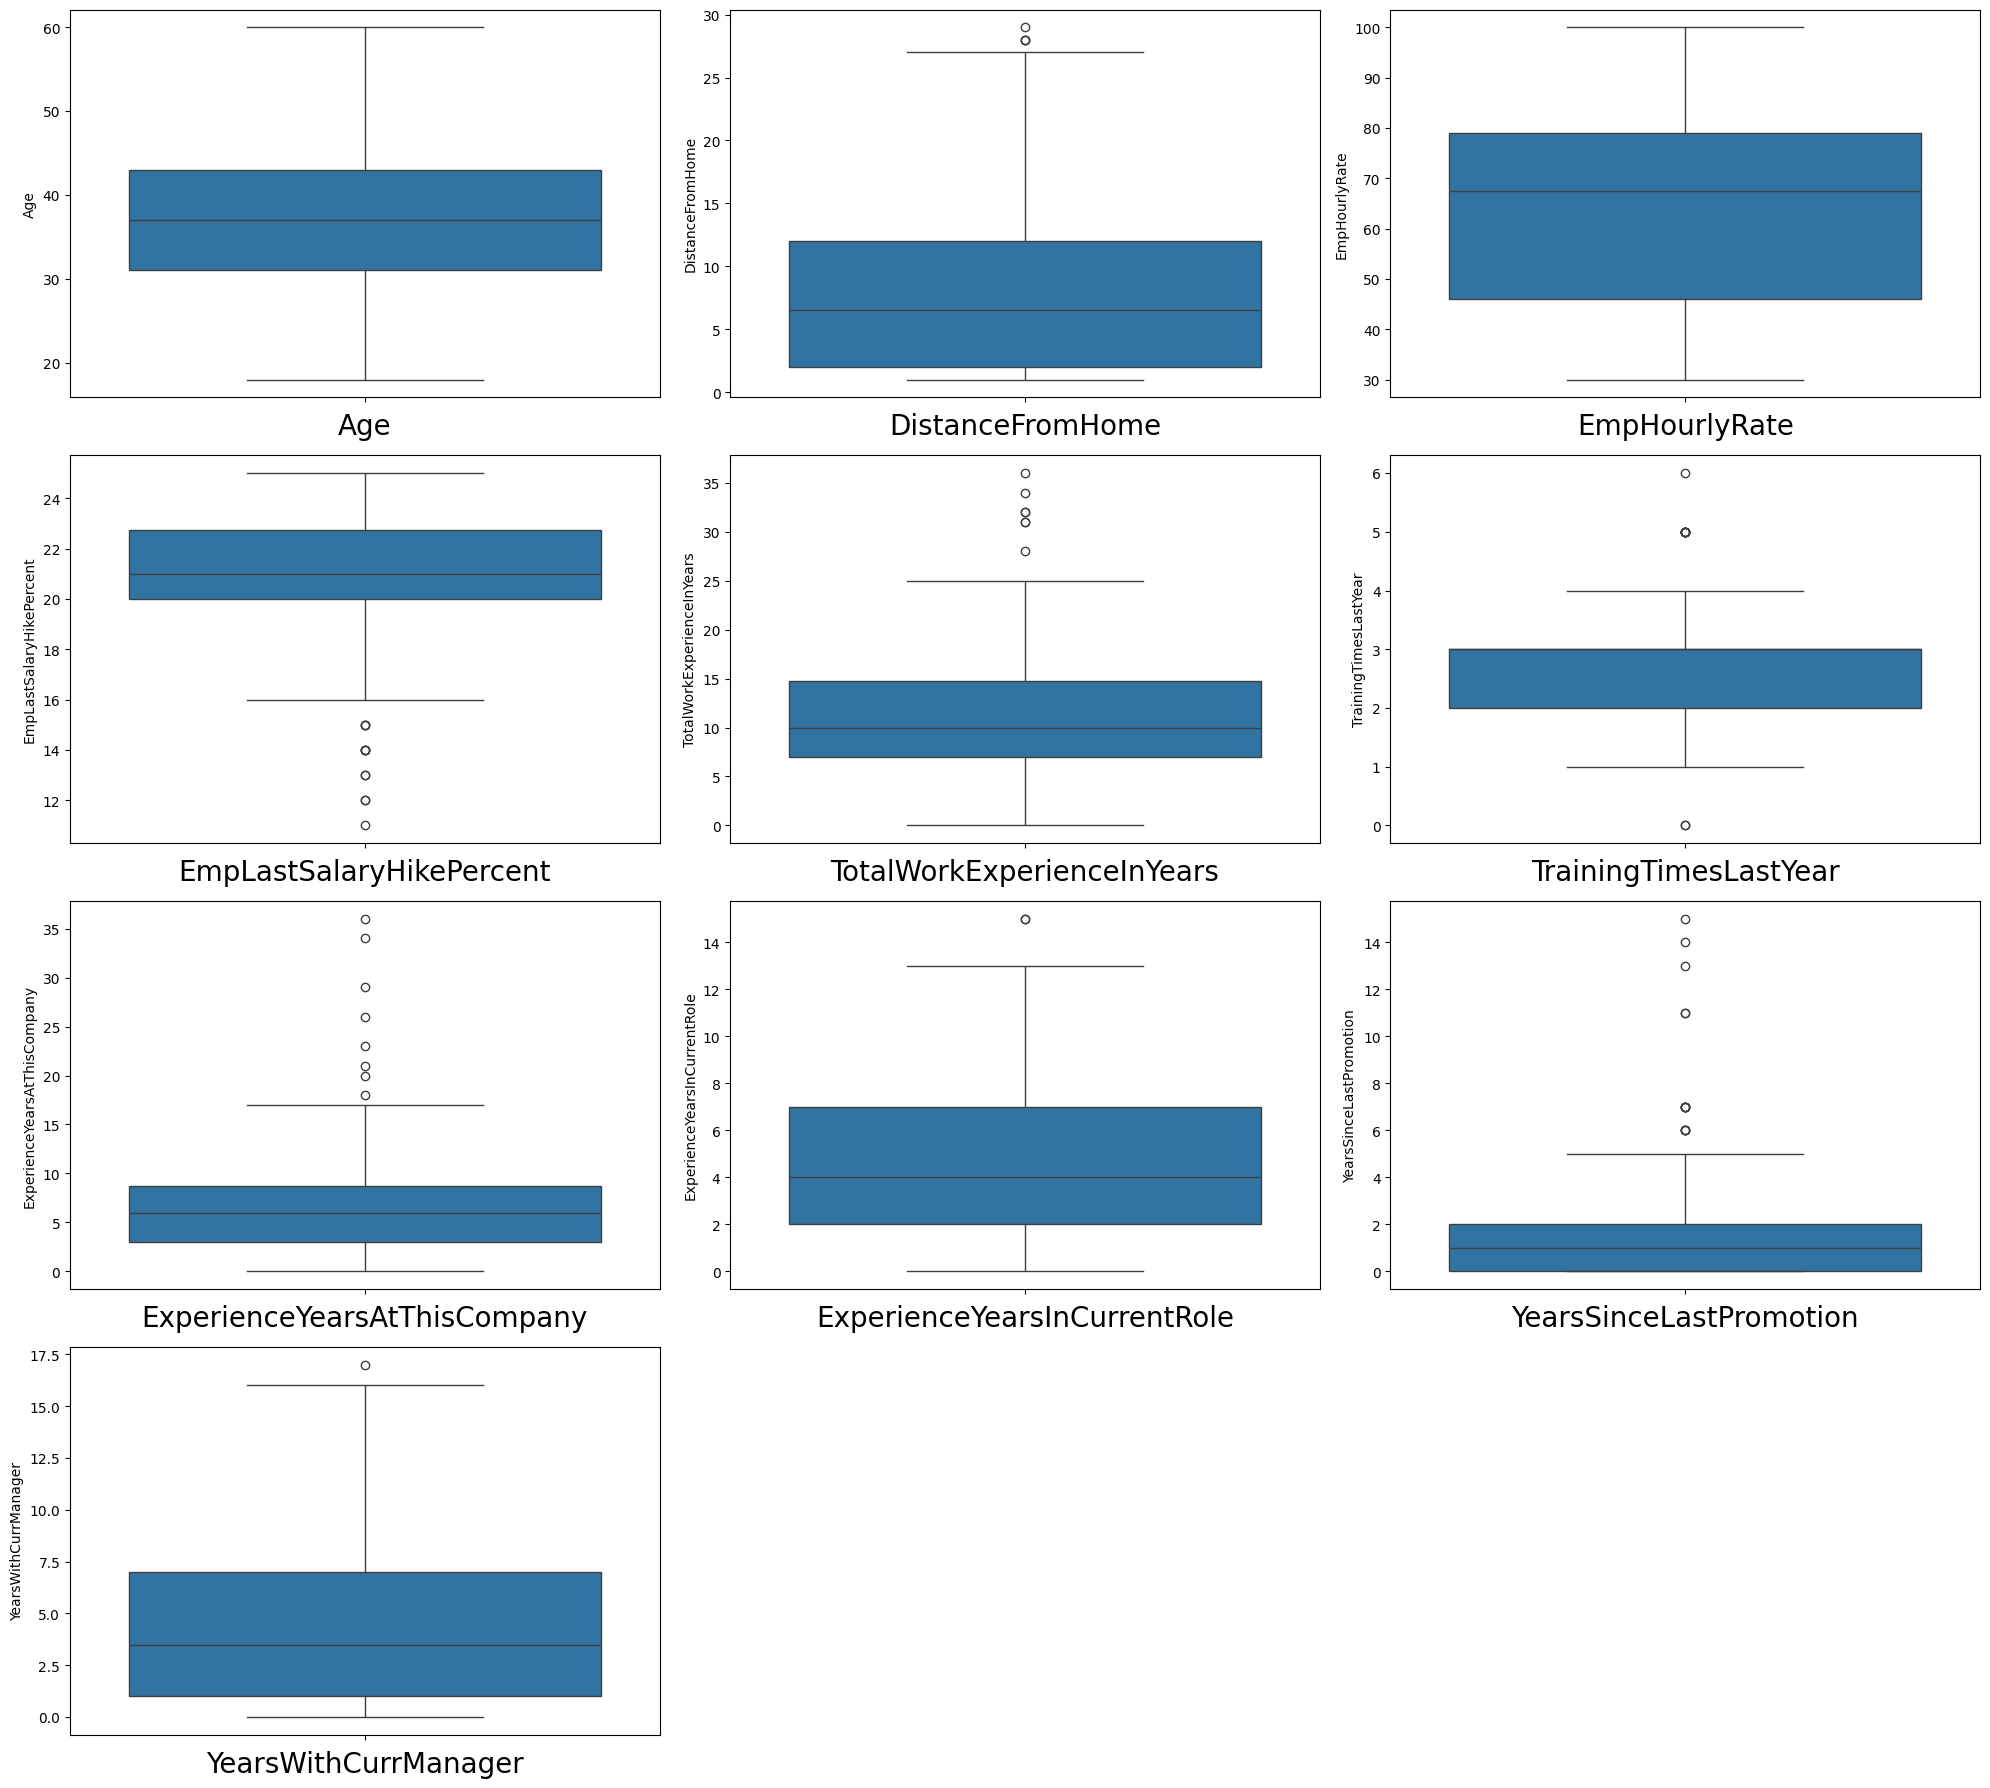

In [31]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

* Here we are use inter quatile range to impute the outlier, becuase data is not normally distributed.

**IQR:**IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

1. **Total Work Experiance in year**

In [32]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.5
Minimum limit: -4.25
Maximum Limit: 26.0


In [33]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [34]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


2. **Training Times Last Year**

In [35]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [36]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [37]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [38]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


3. **Experience Years At This Company**

In [39]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.5
Minimum limit: -5.25
Maximum Limit: 17.0


In [40]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [41]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


4.  **Experience Years In Current Role**

In [42]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [43]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [44]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


5. **Years Since Last Promotion**

In [45]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 2.0
Minimum limit: -3.0
Maximum limit 5.0


In [46]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [47]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


6. **Years With Current Manager**

In [48]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 6.0
Minimum limit: -8.0
Maximum limit 16.0


In [49]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [50]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


**CHECKING OUTLIER AFTER IMPUTATION**

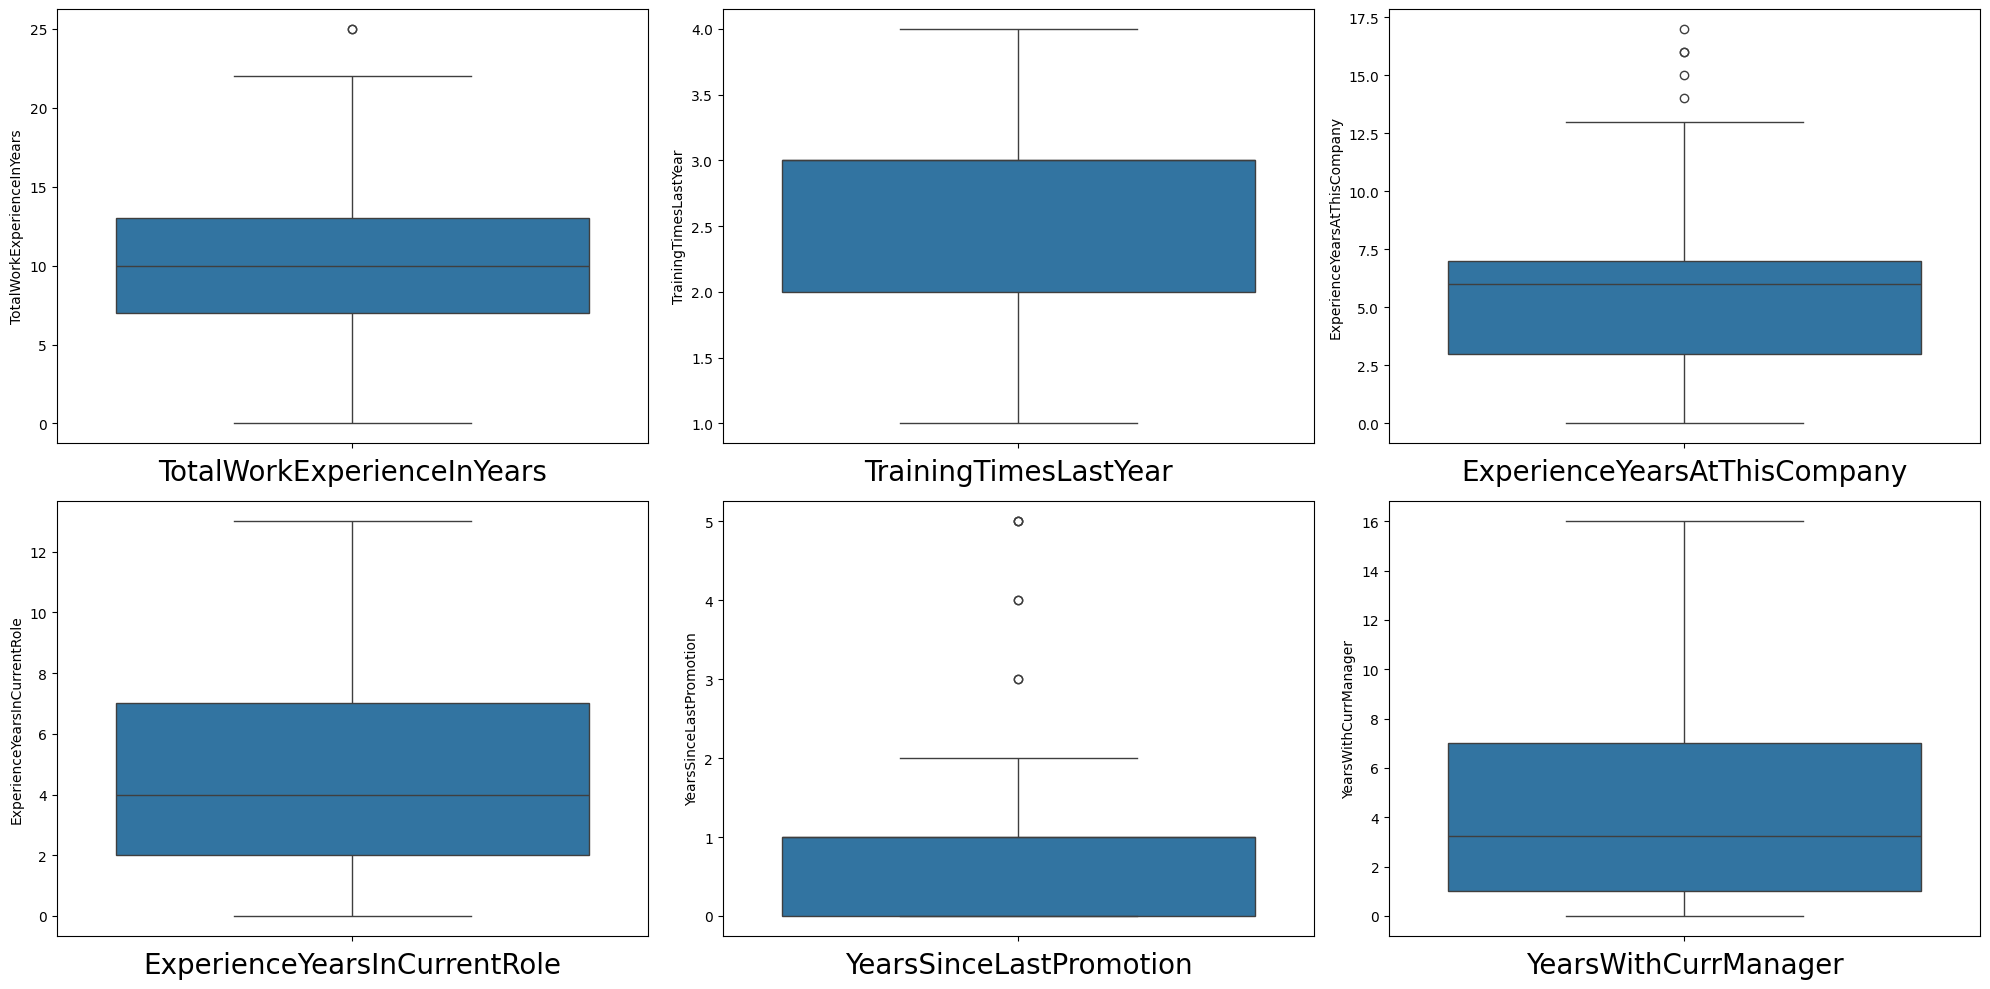

In [51]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

**Observation:** \
* Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

**FEATURE TRANSFORMATION**

* From the last EDA file we get the yearsince last promotion feature have some skewed in data, so we are going to use square root transformation.


**Q-Q Plot:** Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.


In [52]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

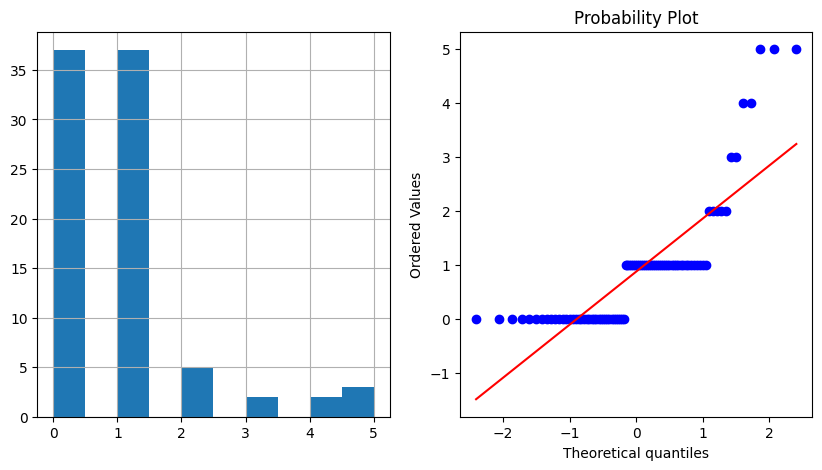

In [53]:
plot_data(data,'YearsSinceLastPromotion')

**SQUARE ROOT TRANSFORMATION**

In [54]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

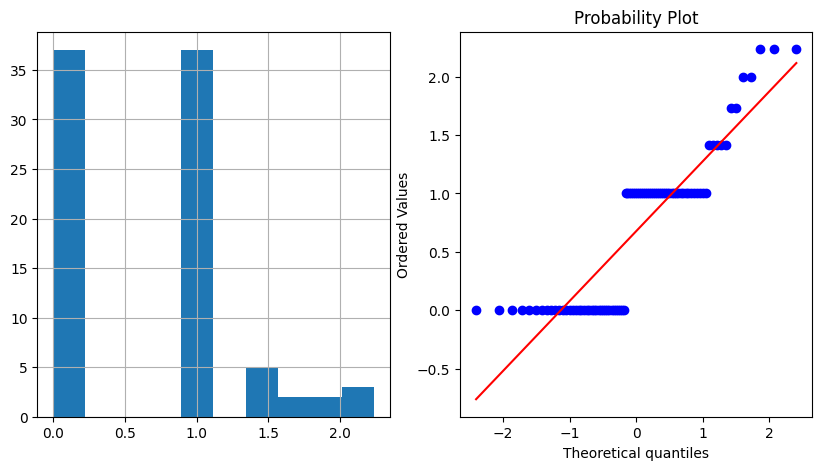

In [55]:
plot_data(data,'square_YearsSinceLastPromotion')

* Now some points are close to the line.

**SCALING THE DATA**

**Standard Scaling:** Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [56]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [57]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001007,0.293103,1,5,2,5,18,1,-0.459943,4,4,-0.821602,2,3,1,5,0,0.119420,3,1.769053,-0.953847,3,0.075417,2.448903,1,2.168951,1,4,0.495046
1,E1001025,-0.757182,1,3,0,5,18,2,2.122288,5,3,1.639836,3,2,4,7,1,0.723542,4,0.000000,-0.953847,2,0.594288,0.761808,1,0.806425,1,4,0.495046
2,E1001054,1.553444,1,3,2,5,11,2,-0.694691,4,3,-1.642081,2,4,1,1,1,-2.901194,1,0.000000,0.623670,4,0.075417,0.480626,1,3.258972,1,4,0.495046
3,E1001059,-1.282324,0,4,1,5,18,2,2.004914,1,3,-1.593817,3,2,4,1,1,0.723542,2,-0.707621,0.623670,2,0.075417,0.199443,1,-0.011090,1,4,0.495046
4,E1001064,-0.337068,1,1,1,5,18,2,-0.812065,3,4,-0.242440,3,2,4,1,1,0.421481,3,-0.707621,0.623670,3,0.075417,0.199443,1,-0.011090,1,4,0.495046


**FEATURE SELECTION**

**DROP UNIQUE AND CONTANT FEATURES**

In [58]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

**CHECKING CORELATION**

**Heatmap:** A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

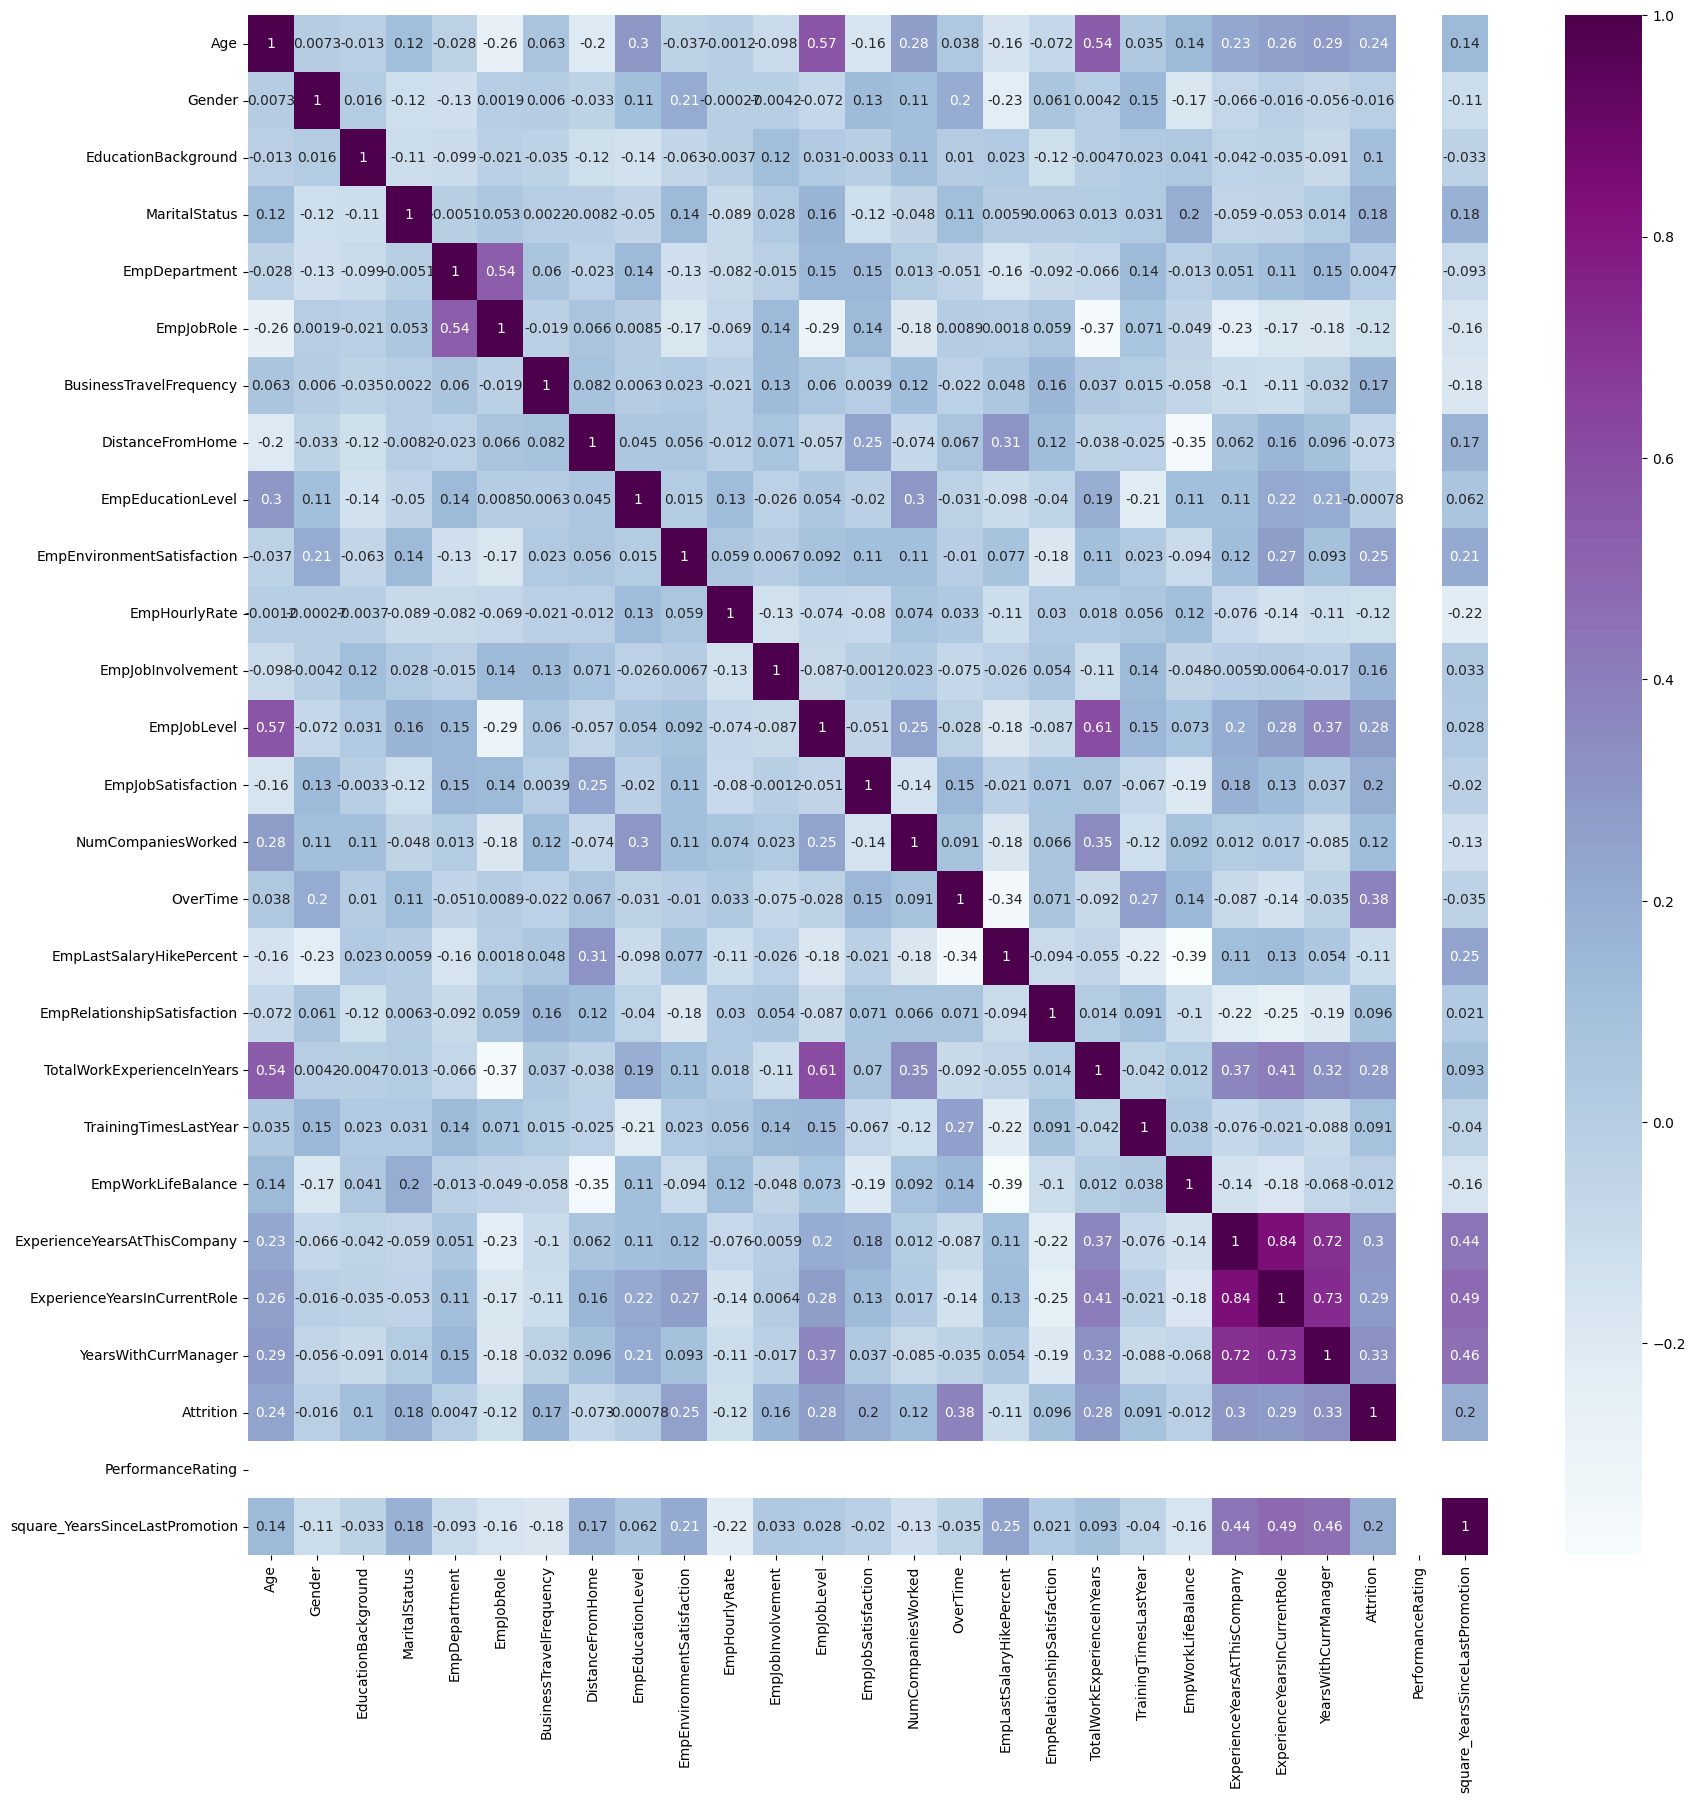

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data


* But we confirm with the help of simple code

In [60]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


* Now we confirm their is no highly correlated feature is present.

**CHECKING DUPLICATES**

In [61]:
data.duplicated().sum()

0

* Their is no Duplicates is present in data.

**PRINCIPLE COMPONENT ANALYSIS**

* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

**Used For:** The dataset contain more than 25 feature, removes the noise in the data and keeps only the most important features in the dataset. That will mitigate the overfitting of the data and increase the model's performance.

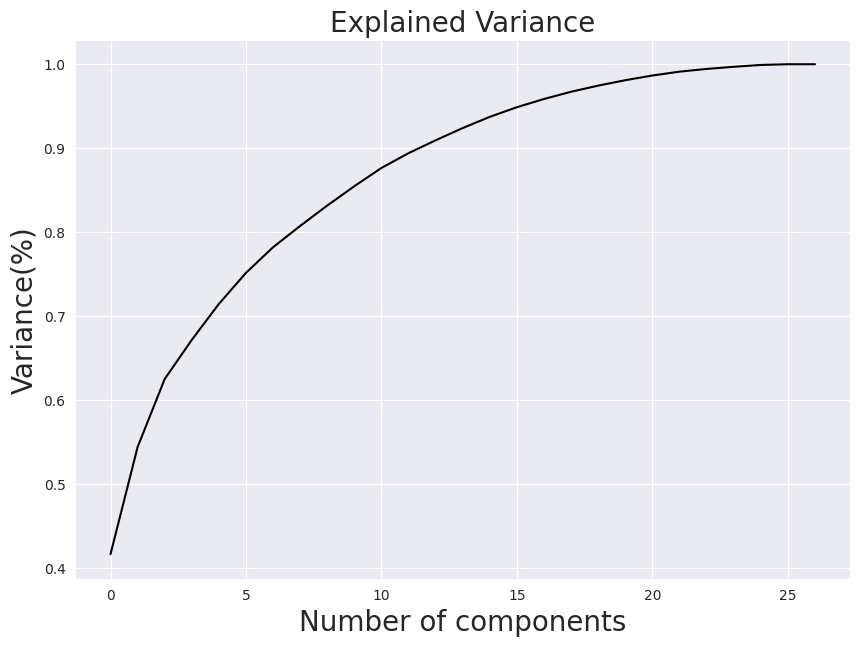

In [62]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**Observation:** Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [63]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

array([[-3.27686831,  3.43032286,  3.35513358, ...,  0.53440108,
         0.95967095, -0.64047866],
       [-3.68162544,  4.54626741,  1.71547284, ..., -0.0897846 ,
        -0.32498126, -0.35033838],
       [ 2.77232533, -1.10183391,  2.86932964, ...,  0.3664837 ,
         0.55050281,  0.49360619],
       ...,
       [-4.97239731, -2.03159383, -0.49957486, ..., -0.05086294,
        -0.65151409,  0.03964967],
       [-4.64784479, -1.71501374,  1.98743424, ..., -0.92742223,
         0.14985445,  0.01982729],
       [-4.75726487, -1.40880023,  0.21021429, ..., -0.06048946,
         0.44784017,  0.12779096]])

**CREATE NEW DATAFRAME**

In [64]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-3.276868,3.430323,3.355134,0.248604,-1.195515,-1.925985,0.672562,0.509702,0.234302,-0.049712,-0.354031,0.256803,-0.812001,-0.752510,0.226711,-1.965145,0.122414,-1.394807,-0.133841,0.524373,-0.218288,-0.725055,0.534401,0.959671,-0.640479,4
1,-3.681625,4.546267,1.715473,-3.575994,1.529259,0.633585,-0.345441,0.615582,1.307157,0.835426,1.731173,-0.150495,-0.452325,-0.282874,-0.055123,-0.342723,-0.142646,0.564042,0.551321,-0.343492,-0.414346,0.136107,-0.089785,-0.324981,-0.350338,4
2,2.772325,-1.101834,2.869330,4.214699,0.834809,-1.075144,-0.619328,-0.504152,-0.362264,-1.589544,0.200951,-2.241616,0.153823,-0.192872,-1.139497,-0.883804,-1.530469,-0.372909,0.045356,-0.099404,-0.702099,-0.642469,0.366484,0.550503,0.493606,4
3,-4.822962,-1.894852,1.050854,-1.242745,-0.852607,1.375044,1.517475,-1.064906,-1.568370,-0.009544,1.139046,-0.280545,0.040261,0.503010,-0.433276,0.169853,-0.448619,0.274795,-0.572362,-0.006242,-0.166830,0.033752,-0.494221,0.140794,0.065222,4
4,-4.660705,-1.289718,1.323014,0.010628,2.401507,0.549255,0.002163,-1.109355,-0.266121,-0.443648,-0.553359,0.273550,0.385133,-1.069490,0.962138,0.384050,0.066955,0.410809,0.405590,-0.594589,-0.005175,0.126183,0.035854,-0.429190,-0.444362,4


**SAVE PRE-PROCESS DATA**

In [65]:
principle_df.to_csv('employee_performance_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_preprocessed_data.csv')

# Get first five rows
df.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-3.276868,3.430323,3.355134,0.248604,-1.195515,-1.925985,0.672562,0.509702,0.234302,-0.049712,-0.354031,0.256803,-0.812001,-0.752510,0.226711,-1.965145,0.122414,-1.394807,-0.133841,0.524373,-0.218288,-0.725055,0.534401,0.959671,-0.640479,4
1,1,-3.681625,4.546267,1.715473,-3.575994,1.529259,0.633585,-0.345441,0.615582,1.307157,0.835426,1.731173,-0.150495,-0.452325,-0.282874,-0.055123,-0.342723,-0.142646,0.564042,0.551321,-0.343492,-0.414346,0.136107,-0.089785,-0.324981,-0.350338,4
2,2,2.772325,-1.101834,2.869330,4.214699,0.834809,-1.075144,-0.619328,-0.504152,-0.362264,-1.589544,0.200951,-2.241616,0.153823,-0.192872,-1.139497,-0.883804,-1.530469,-0.372909,0.045356,-0.099404,-0.702099,-0.642469,0.366484,0.550503,0.493606,4
3,3,-4.822962,-1.894852,1.050854,-1.242745,-0.852607,1.375044,1.517475,-1.064906,-1.568370,-0.009544,1.139046,-0.280545,0.040261,0.503010,-0.433276,0.169853,-0.448619,0.274795,-0.572362,-0.006242,-0.166830,0.033752,-0.494221,0.140794,0.065222,4
4,4,-4.660705,-1.289718,1.323014,0.010628,2.401507,0.549255,0.002163,-1.109355,-0.266121,-0.443648,-0.553359,0.273550,0.385133,-1.069490,0.962138,0.384050,0.066955,0.410809,0.405590,-0.594589,-0.005175,0.126183,0.035854,-0.429190,-0.444362,4


**MODEL CREATION & EVALUATION SUMMARY:**

* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

**LOADING PREPROCESS DATA**

In [66]:
data = pd.read_csv('employee_performance_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-3.276868,3.430323,3.355134,0.248604,-1.195515,-1.925985,0.672562,0.509702,0.234302,-0.049712,-0.354031,0.256803,-0.812001,-0.752510,0.226711,-1.965145,0.122414,-1.394807,-0.133841,0.524373,-0.218288,-0.725055,0.534401,0.959671,-0.640479,4
1,-3.681625,4.546267,1.715473,-3.575994,1.529259,0.633585,-0.345441,0.615582,1.307157,0.835426,1.731173,-0.150495,-0.452325,-0.282874,-0.055123,-0.342723,-0.142646,0.564042,0.551321,-0.343492,-0.414346,0.136107,-0.089785,-0.324981,-0.350338,4
2,2.772325,-1.101834,2.869330,4.214699,0.834809,-1.075144,-0.619328,-0.504152,-0.362264,-1.589544,0.200951,-2.241616,0.153823,-0.192872,-1.139497,-0.883804,-1.530469,-0.372909,0.045356,-0.099404,-0.702099,-0.642469,0.366484,0.550503,0.493606,4
3,-4.822962,-1.894852,1.050854,-1.242745,-0.852607,1.375044,1.517475,-1.064906,-1.568370,-0.009544,1.139046,-0.280545,0.040261,0.503010,-0.433276,0.169853,-0.448619,0.274795,-0.572362,-0.006242,-0.166830,0.033752,-0.494221,0.140794,0.065222,4
4,-4.660705,-1.289718,1.323014,0.010628,2.401507,0.549255,0.002163,-1.109355,-0.266121,-0.443648,-0.553359,0.273550,0.385133,-1.069490,0.962138,0.384050,0.066955,0.410809,0.405590,-0.594589,-0.005175,0.126183,0.035854,-0.429190,-0.444362,4


**DEFINE INDEPENDANT & DEPENDANT FEATURES**

In [67]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [68]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-3.276868,3.430323,3.355134,0.248604,-1.195515,-1.925985,0.672562,0.509702,0.234302,-0.049712,-0.354031,0.256803,-0.812001,-0.752510,0.226711,-1.965145,0.122414,-1.394807,-0.133841,0.524373,-0.218288,-0.725055,0.534401,0.959671,-0.640479
1,-3.681625,4.546267,1.715473,-3.575994,1.529259,0.633585,-0.345441,0.615582,1.307157,0.835426,1.731173,-0.150495,-0.452325,-0.282874,-0.055123,-0.342723,-0.142646,0.564042,0.551321,-0.343492,-0.414346,0.136107,-0.089785,-0.324981,-0.350338
2,2.772325,-1.101834,2.869330,4.214699,0.834809,-1.075144,-0.619328,-0.504152,-0.362264,-1.589544,0.200951,-2.241616,0.153823,-0.192872,-1.139497,-0.883804,-1.530469,-0.372909,0.045356,-0.099404,-0.702099,-0.642469,0.366484,0.550503,0.493606
3,-4.822962,-1.894852,1.050854,-1.242745,-0.852607,1.375044,1.517475,-1.064906,-1.568370,-0.009544,1.139046,-0.280545,0.040261,0.503010,-0.433276,0.169853,-0.448619,0.274795,-0.572362,-0.006242,-0.166830,0.033752,-0.494221,0.140794,0.065222
4,-4.660705,-1.289718,1.323014,0.010628,2.401507,0.549255,0.002163,-1.109355,-0.266121,-0.443648,-0.553359,0.273550,0.385133,-1.069490,0.962138,0.384050,0.066955,0.410809,0.405590,-0.594589,-0.005175,0.126183,0.035854,-0.429190,-0.444362


In [69]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: PerformanceRating, dtype: int64